In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [ ]:
SPOTIFY_SAMPLE_FP = 'data_music_features/maharshipandya-spotify-tracks-dataset.csv'
# '/Users/sarahnguyen/Downloads/music.csv'

### Import and Basic Cleaning

In [ ]:
# source: https://medium.com/@juanfraleonhardt/music-genre-classification-a-machine-learning-exercise-9c83108fd2bb
# Load the data, removing leading and trailing spaces and dropping duplicates
df = pd.read_csv(SPOTIFY_SAMPLE_FP).iloc[:,1:]
df.columns = df.columns.str.strip()
df = df.drop_duplicates()

# Drop rows where genres are based on language and not audio features
language_genres = ['british','french','german','swedish','spanish','indian','malay','turkish','world-music']
df = df.drop(df[df['track_genre'].isin(language_genres)].index)

# Convert booleans to integers
df['explicit'] = df['explicit'].astype(int)

df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.92400,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.90500,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111995,3TpcGANz2N705Bq4zc982H,Roots Manuva,Run Come Save Me,Trim Body,17,215720,1,0.798,0.6840,2,-5.138,1,0.1680,0.03070,0.000159,0.4790,0.557,94.936,4,trip-hop
111996,57qWtXga1hMwSfkhLDJCKQ,Everything But The Girl,Worldwide (Deluxe Edition),My Head Is My Only House Unless It Rains - 201...,18,178586,0,0.590,0.1200,5,-12.451,1,0.0374,0.89900,0.000023,0.1090,0.369,107.099,4,trip-hop
111997,0xcDUsknTawAv5VZKQ62aZ,Wax Tailor,Dusty Rainbow from the Dark,From The Dark,17,202960,0,0.460,0.2920,11,-11.922,1,0.0281,0.37300,0.229000,0.1700,0.357,158.906,3,trip-hop
111998,7LVOum3l1HrbitK9AoUPd7,Cibo Matto,Hotel Valentine,Emerald Tuesday,17,199893,0,0.554,0.8980,0,-7.642,1,0.0474,0.00732,0.833000,0.4780,0.853,113.289,1,trip-hop


In [5]:
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
# Scale numeric audio features
numeric_features = ['popularity','duration_ms','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
scaler = MinMaxScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])

### Associations

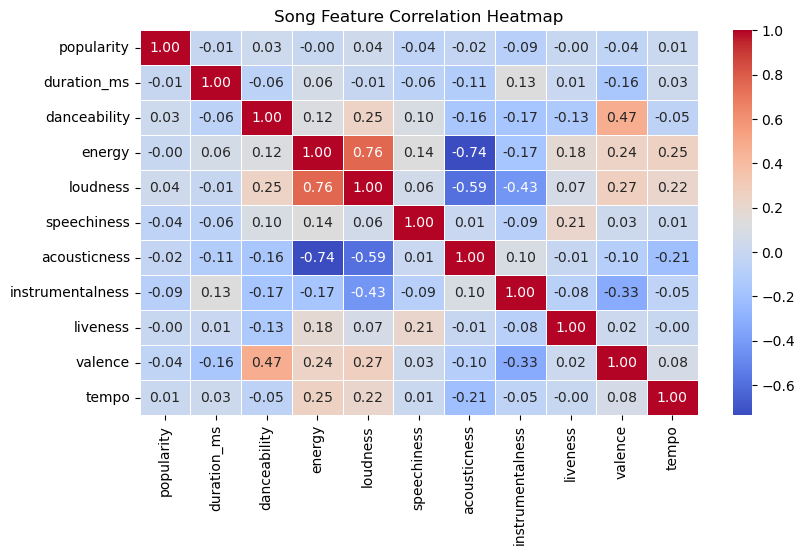

In [8]:
# source: https://medium.com/@juanfraleonhardt/music-genre-classification-a-machine-learning-exercise-9c83108fd2bb

# Visualization
plt.figure(figsize=(9, 5))
plt.title("Song Feature Correlation Heatmap")
#sns.set(font_scale=0.8)
corr = df[numeric_features].corr()
sns.heatmap(corr, annot=True, linewidths=.5, cmap='coolwarm', fmt=".2f")
plt.show()


Takeaways:
- Songs that are louder have more energy
- Songs that are happier (valence) are more dancable
- Songs that are more acoustic have less energy and are less loud
- Songs that are more instrumental are also less loud

### Encoding for Clustering

Can use one-hot but will create sparsity and 100+ columns. Would retain genre signal b/c there is no inherent order to genre.
Label encoding will remove the sparsity problem and make clustering easier. Could inject some weird ordinal behavior into genre, but I think we have to do it. Can compare with OHE later.

In [9]:
# [TODO] Compare OHE implementaion

In [ ]:
# example did this incorrectly. keys and time signature do have ordering and are already encoded
# don't need to be one hot
#df = pd.get_dummies(df, columns=['key'], prefix = 'key', drop_first=True)
#df = pd.get_dummies(df, columns=['time_signature'], prefix = 'meter', drop_first=True)

In [10]:
df['key'].value_counts()

key
7     12183
0     11929
2     10623
9     10249
1      9968
5      8642
11     8534
4      8168
6      7343
10     6869
8      6797
3      3287
Name: count, dtype: int64

In [11]:
df['time_signature'].value_counts()

time_signature
4    93594
3     8273
5     1689
1      877
0      159
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
len(df['track_genre'].unique())

105

In [17]:
df.drop("track_genre", axis=1)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,0.73,0.044043,0,0.686294,0.4610,1,0.791392,0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.55,0.028566,0,0.426396,0.1660,1,0.597377,1,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.57,0.040255,0,0.444670,0.3590,0,0.736123,1,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0.71,0.038557,0,0.270051,0.0596,0,0.573701,1,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,0.82,0.037969,0,0.627411,0.4430,2,0.737103,1,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111995,3TpcGANz2N705Bq4zc982H,Roots Manuva,Run Come Save Me,Trim Body,0.17,0.041189,1,0.810152,0.6840,2,0.821135,1,0.174093,0.030823,0.000159,0.4790,0.559799,0.390086,4
111996,57qWtXga1hMwSfkhLDJCKQ,Everything But The Girl,Worldwide (Deluxe Edition),My Head Is My Only House Unless It Rains - 201...,0.18,0.034099,0,0.598985,0.1200,5,0.685866,1,0.038756,0.902610,0.000023,0.1090,0.370854,0.440063,4
111997,0xcDUsknTawAv5VZKQ62aZ,Wax Tailor,Dusty Rainbow from the Dark,From The Dark,0.17,0.038753,0,0.467005,0.2920,11,0.695651,1,0.029119,0.374498,0.229000,0.1700,0.358794,0.652935,3
111998,7LVOum3l1HrbitK9AoUPd7,Cibo Matto,Hotel Valentine,Emerald Tuesday,0.17,0.038167,0,0.562437,0.8980,0,0.774818,1,0.049119,0.007349,0.833000,0.4780,0.857286,0.465497,1


In [18]:
# label encode genre

# Perform Label Encoding
label_encoder = LabelEncoder()
encoded_genre = label_encoder.fit_transform(df["track_genre"].values)
encoded_genre

array([  0,   0,   0, ..., 104, 104, 104])

In [21]:
df['encoded_genre'] = encoded_genre

### Data Minimization & Export

In [22]:
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'encoded_genre'],
      dtype='object')

#### On Time Signature from ChatGPT:

Prompt: "I'm clustering music tracks based off of music features. Should I use time signature as a clustering feature?

**time_signature**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4."

Response: 
"It depends on what aspect of the music you're trying to capture with clustering. Here are some considerations:  

When to Include **Time Signature**  
✅ If your goal is to group tracks by rhythmic structure or feel, then **yes**, time signature is relevant. Songs with a **3/4** (waltz) feel are rhythmically distinct from **4/4** (common time) or **7/4** (odd meter). If your clustering is focused on genres or rhythmic patterns, this could be useful.  

When to Exclude **Time Signature**  
❌ If your clustering is more focused on **timbre, mood, or melody** (e.g., clustering songs based on energy, danceability, or instrumentation), time signature might not contribute much since many genres predominantly use **4/4** time. In this case, including it may add noise rather than meaningful separation.  

Alternative Approach  
🔹 **Test it both ways**: Run clustering with and without **time_signature** and evaluate if it improves separation or introduces unnecessary fragmentation.  
🔹 **Combine with other rhythmic features**: If using time signature, it may be helpful alongside **tempo** and **beat strength** for a fuller rhythmic profile.  

Would you like suggestions on which clustering algorithms to use for this?"

In [23]:
# [TODO] df.drop("track_genre", axis=1)
# drop og before training

In [ ]:
df.to_csv('data_music_features/processed_spotify_sample.csv')